<a href="https://colab.research.google.com/github/nnilocoelho/computer-vision/blob/main/nb02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa 2 – Equalizando uma Imagem e Ressaltando uma Característica
1. Ler uma imagem à sua escolha, usando OpenCV;
2. Decomponha os canais da imagem, nas versões R, G e B;
3. Gere o histograma padrão da imagem;
4. Gere o histograma decomposto em R, G e B;
5. Equalize a imagem escolhida para ressaltar alguma característica à sua escolha;
6. Selecione e redimensione a imagem para se aproximar da característica à sua
escolha;
7. Desenhe um círculo em torno da característica ressaltada.

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

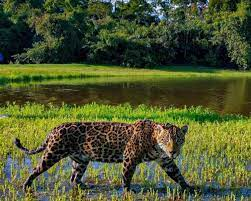

In [ ]:
# 1 - Leitura de Imagem
img_onca = cv2.imread("/home/imagens/onca-pintada.jpg")
cv2_imshow(img_onca)

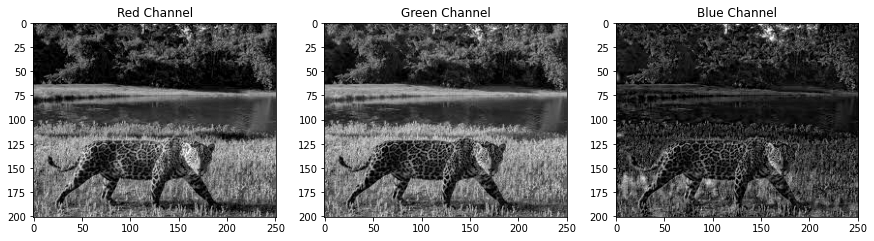

In [ ]:
# 2 - Decomposição RGB
img_bgr = cv2.imread("/home/imagens/onca-pintada.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_bgr)

# Exibição dos Canais
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

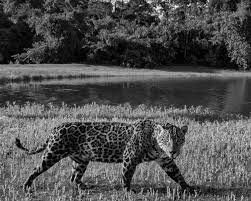

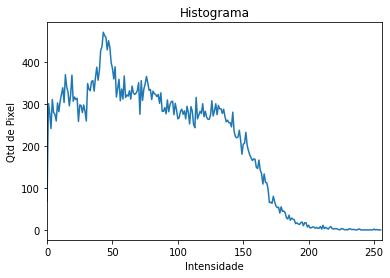

In [ ]:
# 3 - Histograma da Imagem

# Leitura e Conversão da Imagem em P&B
img_onca = cv2.imread("/home/imagens/onca-pintada.jpg")
img_onca = cv2.cvtColor(img_onca, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_onca)

# Calculo do Histograma
histograma = cv2.calcHist([img_onca], [0], None, [256],[0, 256])
plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Qtd de Pixel")
plt.plot(histograma)
plt.xlim([0, 256])
plt.show()

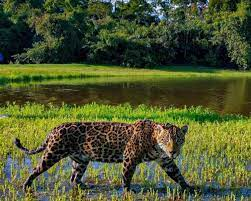

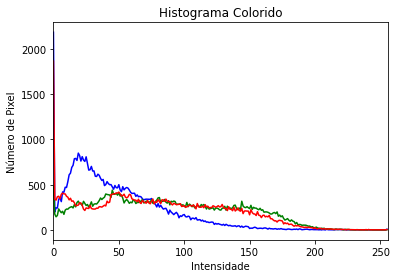

In [ ]:
# 4 - Histograma Decomposto RGB

# Leitura da Imagem
img_onca = cv2.imread("/home/imagens/onca-pintada.jpg")
cv2_imshow(img_onca)

# Decomposição dos Canais
canais = cv2.split(img_onca)
cores = ("b", "g", "r")
plt.figure()
plt.title("Histograma Colorido")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixel")
for (canal, cor) in zip(canais, cores):
    hist = cv2.calcHist ([canal], [0], None, [256], [0, 256])
    plt.plot(hist, cor)
    plt.xlim([0, 256])
plt.show()

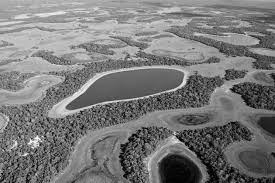

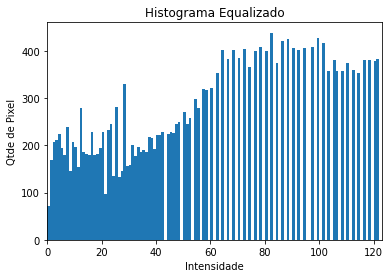

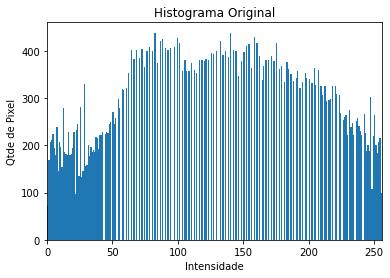

In [ ]:
# 5 - Equalização de Imagem

img = cv2.imread("/home/imagens/rio.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h_eq = cv2.equalizeHist(img)
cv2_imshow(img)

plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixel")
plt.hist(h_eq.ravel(), 256, [0, 256])
plt.xlim([0, 123])
plt.show()

plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixel")
plt.hist(h_eq.ravel(), 256, [0, 256])
plt.xlim([0, 256])
plt.show()

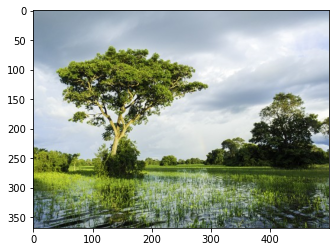

In [21]:
# 6 - Redimensão de Imagens
img_NZ_bgr = cv2.imread("/home/imagens/pantanal-bioma.jpg",cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:,:,::-1] 

plt.imshow(img_NZ_rgb)

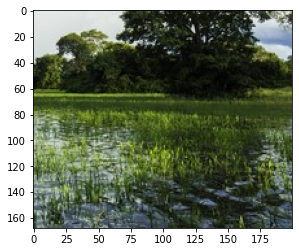

In [22]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

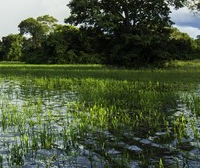

In [23]:
# Swap channel order
cropped_region = cropped_region[:,:,::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename='cropped_region.png') 

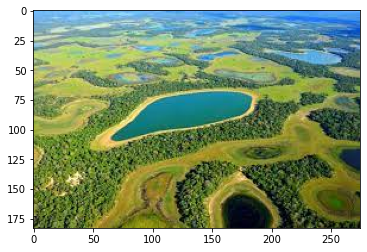

In [5]:
# 7 - Circulo na imagem

# Read in an image
image = cv2.imread("/home/imagens/rio.jpeg")

# Display the original image
plt.imshow(image[:,:,::-1])

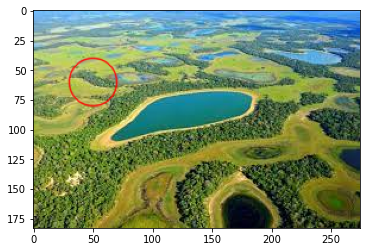

In [20]:
# Draw a circle
imageCircle = image.copy()

cv2.circle(imageCircle, (50,60), 20, (0, 0, 255), thickness=0, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageCircle[:,:,::-1])